## IRIS DATASET CLASSIFICATION TASK

In [2]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


Dataset Overview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa   

Summary Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.80000

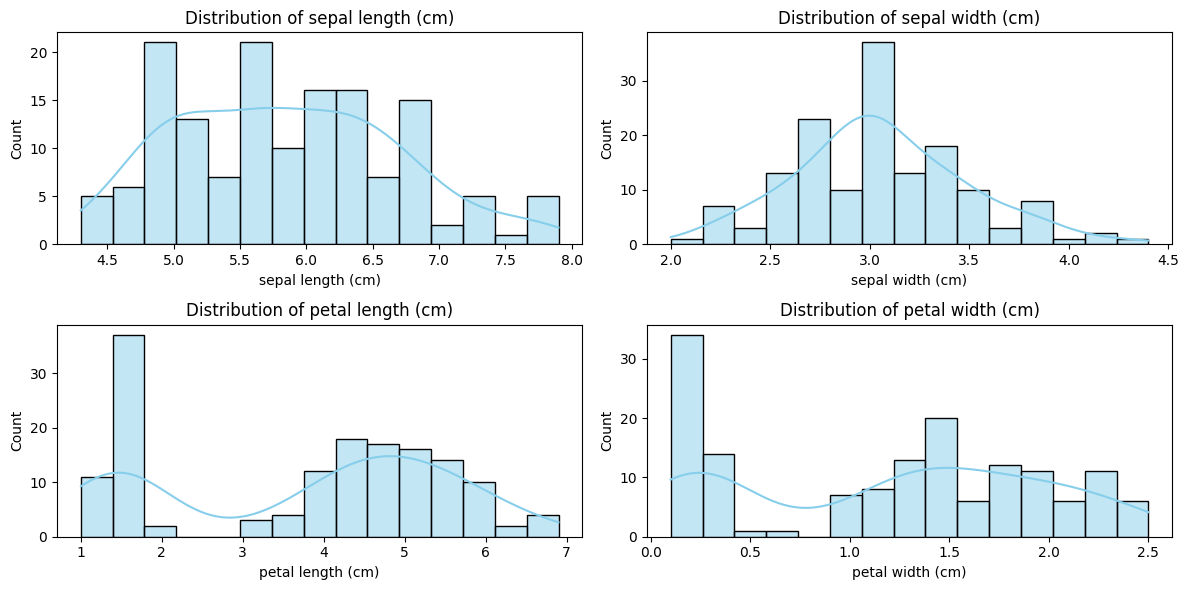

0 -> setosa
1 -> versicolor
2 -> virginica
Feature names saved to 'artifacts/iris_feature_names.txt'

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

Model has been saved to 'artifacts/iris_random_forest_model.pkl'


In [6]:
import os
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# ======================
# Exploratory Data Analysis (EDA)
# ======================

# Load the Iris dataset and create a DataFrame
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Summary statistics
print("Dataset Overview:")
print(df.head(), "\n")
print("Summary Statistics:")
print(df.describe(), "\n")
print("Class Distribution:")
print(df['species'].value_counts(), "\n")

# Visualizing feature distributions
plt.figure(figsize=(12, 6))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[feature], kde=True, bins=15, color='skyblue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# ======================
# Splitting the Data and Model Training
# ======================

# Define features (X) and labels (y)
X = iris.data
y = iris.target

# Get the unique target values (0, 1, 2) and their corresponding species names
label_to_species_mapping = dict(enumerate(iris.target_names))

# Display the mapping of label to species
for label, species in label_to_species_mapping.items():
    print(f"{label} -> {species}")

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42, stratify=iris.target)

# Save feature names to a .txt file
features = iris.feature_names
model_dir = "artifacts"
os.makedirs(model_dir, exist_ok=True)  # Create the directory if it doesn't exist
feature_file_path = os.path.join(model_dir, 'iris_feature_names.txt')

# Write feature names to a text file
with open(feature_file_path, 'w') as f:
    for feature in features:
        f.write(f"{feature}\n")

print(f"Feature names saved to '{feature_file_path}'")

# Train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Save the trained model to a file using joblib
model_path = os.path.join(model_dir, 'iris_random_forest_model.pkl')
joblib.dump(clf, model_path)

print(f"Model has been saved to '{model_path}'")

## ADULT INCOME PREDICTION TASK

#### Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle
import joblib
import os

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
           'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 
           'hours-per-week', 'native-country', 'income']
df = pd.read_csv(url, names=columns, header=None, na_values=" ?")

# Drop rows with missing values
df.dropna(inplace=True)

# Manual encoding of categorical features
def manual_encode_column(df, col_name):
    unique_values = df[col_name].unique()
    mapping = {value: idx for idx, value in enumerate(unique_values)}
    df[col_name] = df[col_name].map(mapping)
    return mapping

# Columns to manually encode
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 
                    'race', 'gender', 'native-country']

# Create an encoder dictionary to store mappings
encoder_dict = {}
for col in categorical_cols:
    encoder_dict[col] = manual_encode_column(df, col)

# Encode the label (income)
df['income'] = df['income'].apply(lambda x: 1 if x == ' >50K' else 0)

# Define features and label
X = df.drop(['income', 'fnlwgt', 'education-num'], axis=1)  # Drop irrelevant columns
y = df['income']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Directory to save the artifacts (model and encoder)
model_dir = "artifacts"
os.makedirs(model_dir, exist_ok=True)  # Create the directory if it doesn't exist

# Save the trained model to a file using joblib
model_path = os.path.join(model_dir, 'adult_income_random_forest_model.pkl')
joblib.dump(model, model_path)
print(f"Model has been saved to '{model_path}'")

# Save the encoder dictionary to a pickle file
encoder_path = os.path.join(model_dir, 'adult_income_encoder.pkl')
with open(encoder_path, 'wb') as f:
    pickle.dump(encoder_dict, f)
print(f"Encoders have been saved to '{encoder_path}'")

# Save the feature names to a .txt file
feature_file_path = os.path.join(model_dir, 'adult_income_feature_names.txt')
with open(feature_file_path, 'w') as f:
    for feature in X.columns:
        f.write(f"{feature}\n")
print(f"Feature names saved to '{feature_file_path}'")

Model has been saved to 'artifacts/adult_income_random_forest_model.pkl'
Encoders have been saved to 'artifacts/adult_income_encoder.pkl'
Feature names saved to 'artifacts/adult_income_feature_names.txt'


## California housing Regression


Dataset Overview:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422   

Summary Statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900

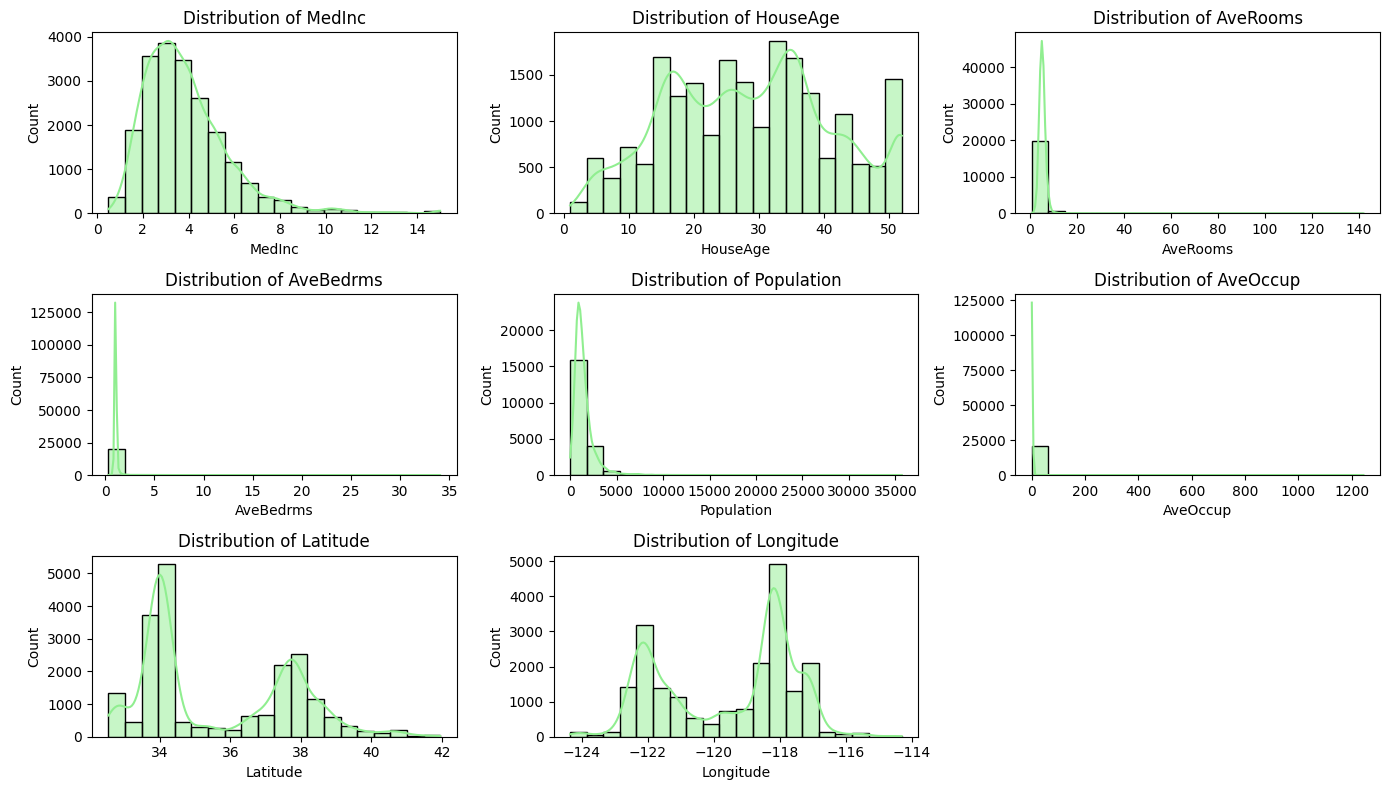

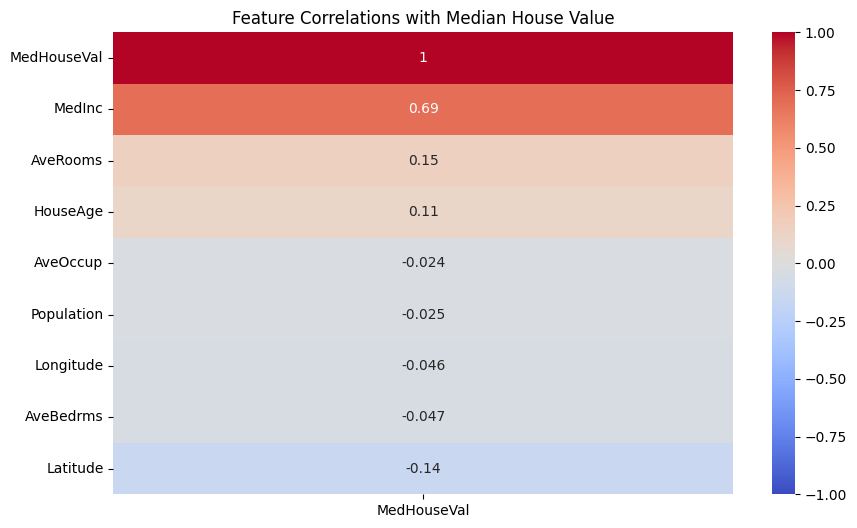


Model Performance:
Mean Squared Error (MSE): 0.5559
R-squared (R2 Score): 0.5758
Model has been saved to 'artifacts/california_linear_regression_model.pkl'
Feature names saved to 'artifacts/california_feature_names.txt'


In [8]:
import os
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ======================
# Exploratory Data Analysis (EDA)
# ======================

# Load the California Housing dataset
california = fetch_california_housing()

# Create a DataFrame for easier analysis
df = pd.DataFrame(data=california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target  # Adding the target variable to the DataFrame

# Dataset overview
print("Dataset Overview:")
print(df.head(), "\n")

# Summary statistics
print("Summary Statistics:")
print(df.describe(), "\n")

# Checking for missing values
print("Missing Values:")
print(df.isnull().sum(), "\n")

# Visualizing distributions of features
plt.figure(figsize=(14, 8))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[feature], kde=True, bins=20, color='lightgreen')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Visualize correlations with the target variable (Median House Value)
plt.figure(figsize=(10, 6))
correlations = df.corr()
sns.heatmap(correlations[['MedHouseVal']].sort_values(by='MedHouseVal', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlations with Median House Value')
plt.show()

# ======================
# Splitting the Data and Model Training
# ======================

# Features (X) and target (y)
X = california.data
y = california.target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# ======================
# Model Evaluation
# ======================

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2 Score): {r2:.4f}")

# ======================
# Save the Model and Feature Names
# ======================

# Define the path to save artifacts (model and feature names)
artifact_path = 'artifacts'
os.makedirs(artifact_path, exist_ok=True)  # Create the directory if it doesn't exist

# Save the trained model using joblib
model_path = os.path.join(artifact_path, 'california_linear_regression_model.pkl')
joblib.dump(model, model_path)
print(f"Model has been saved to '{model_path}'")

# Save feature names to a .txt file
feature_file_path = os.path.join(artifact_path, 'california_feature_names.txt')
with open(feature_file_path, 'w') as f:
    for feature in california.feature_names:
        f.write(f"{feature}\n")
print(f"Feature names saved to '{feature_file_path}'")